In [33]:
import random
import math
import matplotlib.pyplot as plt

# Configuración base
TAMANO_POBLACION = 5000
GENERACIONES = 50
NUMERO_VARIABLES = 3
LIMITES = [(-10, 10)] * NUMERO_VARIABLES

def evaluar_aptitud(individuo):
    x, y, z = individuo
    f1 = 3 * x**2 + math.sin(x * y) - z**2 + 2
    f2 = 2 * x**3 - y**2 - z + 3
    f3 = math.sin(2 * x) + math.cos(y * z) + y - 1
    return f1**2 + f2**2 + f3**2

def inicializar_poblacion():
    return [[random.uniform(*LIMITES[i]) for i in range(NUMERO_VARIABLES)] for _ in range(TAMANO_POBLACION)]

def seleccion_torneo(poblacion, k=3):
    return min(random.sample(poblacion, k), key=evaluar_aptitud)

def cruzar(padre1, padre2):
    return [(a + b) / 2 for a, b in zip(padre1, padre2)]

def mutar(individuo, tasa_mutacion):
    return [x + random.gauss(0, 1) if random.random() < tasa_mutacion else x for x in individuo]

def ejecutar_ega(tasa_mutacion, porcentaje_elitismo):
    poblacion = inicializar_poblacion()
    historial = []

    for _ in range(GENERACIONES):
        poblacion.sort(key=evaluar_aptitud)
        n_elite = int(TAMANO_POBLACION * porcentaje_elitismo)
        elite = poblacion[:n_elite]

        hijos = []
        while len(hijos) < TAMANO_POBLACION - n_elite:
            padre1 = seleccion_torneo(elite if elite else poblacion)
            padre2 = seleccion_torneo(elite if elite else poblacion)
            hijo = cruzar(padre1, padre2)
            hijo = mutar(hijo, tasa_mutacion)
            hijos.append(hijo)

        poblacion = elite + hijos
        mejor = min(poblacion, key=evaluar_aptitud)
        historial.append(evaluar_aptitud(mejor))

    return historial


Elitismo 0%...
Elitismo 25%...
Elitismo 50%...
Elitismo 75%...
Elitismo 100%...


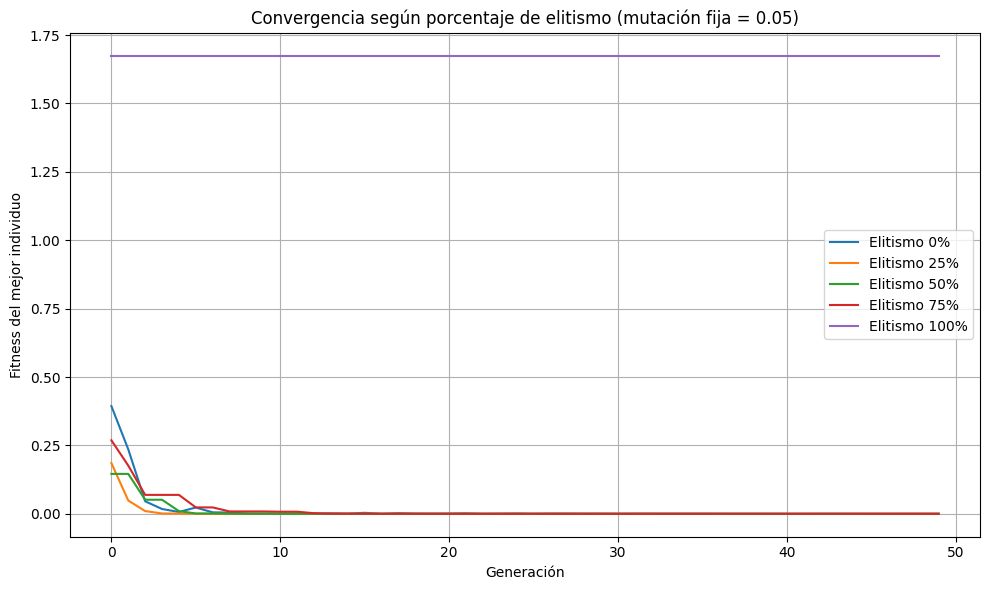

In [34]:
# Elitismo: 0% a 100%, tasa de mutación fija
tasas_elitismo = [0.0, 0.25, 0.5, 0.75, 1.0]
tasa_mutacion_fija = 0.05
resultados_elitismo = {}

for e in tasas_elitismo:
    print(f"Elitismo {int(e*100)}%...")
    resultados_elitismo[e] = ejecutar_ega(tasa_mutacion_fija, e)

# Graficar
plt.figure(figsize=(10, 6))
for e, hist in resultados_elitismo.items():
    plt.plot(hist, label=f"Elitismo {int(e*100)}%")
plt.xlabel("Generación")
plt.ylabel("Fitness del mejor individuo")
plt.title("Convergencia según porcentaje de elitismo (mutación fija = 0.05)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



Tasa de mutación 0.001...
Tasa de mutación 0.05...
Tasa de mutación 0.5...
Tasa de mutación 0.9...


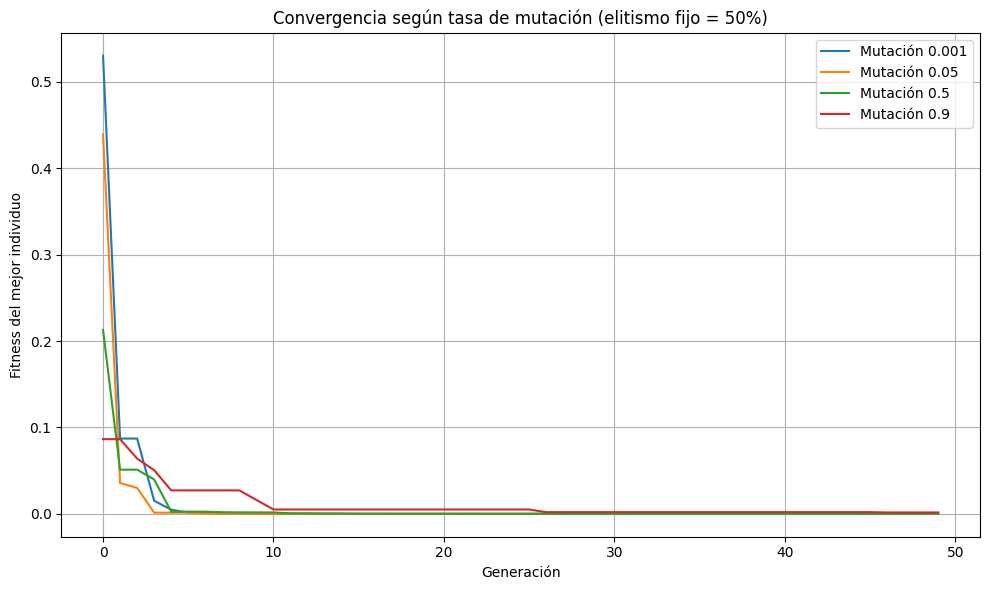

In [35]:
# Mutación: de baja a alta, elitismo fijo
tasas_mutacion = [0.001, 0.05, 0.5, 0.9]
elitismo_fijo = 0.5
resultados_mutacion = {}

for m in tasas_mutacion:
    print(f"Tasa de mutación {m}...")
    resultados_mutacion[m] = ejecutar_ega(m, elitismo_fijo)

# Graficar
plt.figure(figsize=(10, 6))
for m, hist in resultados_mutacion.items():
    plt.plot(hist, label=f"Mutación {m}")
plt.xlabel("Generación")
plt.ylabel("Fitness del mejor individuo")
plt.title("Convergencia según tasa de mutación (elitismo fijo = 50%)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
